In [6]:
from datetime import timedelta
import pandas as pd
import os
from dateutil.relativedelta import relativedelta
import requests
import time
from datetime import datetime


In [2]:


def get_lyon_weather_df(window_size=1,delta=0):
    """
    Returns a df with weather information on Lyon stations between 2011-11
    and 2021-11, windowed, window size in days.
    Columns :
    - date
    - precipitation
    - temperature
    - station_id
    Needs the extracted weather csv files in cooked_data/saone/weather
    """

    csv_dir = '../../cooked_data/saone/weather/api_extraction/'
    csv_ids_paths = []

    ## READS THE CSV FILES AND CREATES A DICT OF DFs

    # (station_id,'path') for each file
    for filename in os.listdir(csv_dir):
        if filename.endswith('.csv'):
            file_path = os.path.join(csv_dir,filename)
            station_id = int(filename.strip('.csv'))

            csv_ids_paths.append((station_id,file_path))


    swdfs = {} # Station Weather dfs

    for id_path in csv_ids_paths :

        station_id = id_path[0]
        swdf = pd.read_csv(id_path[1])
        swdf.set_index('date',inplace=True)

        swdfs[station_id] = swdf

    ## DOES THE WINDOW AND CONCATENATE THE RESULT IN A DF
    if window_size > 60 : window_size = 60 # 25 days max window

    swdfs_win = []  # Weather df windowed

    for station_id, swdf in swdfs.items():

        swdf_win = swdf.rolling(window=window_size).mean().dropna()
        swdf_win['station_id'] = station_id
        swdfs_win.append(swdf_win)

    weather_win = swdfs_win[0]

    for swdf_win in swdfs_win[1:]:
        weather_win = pd.concat([weather_win, swdf_win])

    weather_win = weather_win.reset_index()
    weather_win['date'] = pd.to_datetime(weather_win['date'])

    if delta > 0 :
        weather_win['date'] = weather_win['date'] + timedelta(delta)

    return weather_win

In [54]:
uri = "http://api.weatherapi.com/v1/forecast.json?"

#key=<YOUR_API_KEY>&q=07112&days=7"

In [61]:
response = requests.post(url = uri,
                         data = {
                        "key" : key,
                        "q": "Lyon",
                        'dt':dt,
                        'end_dt':end_dt,
                         })

response

<Response [200]>

In [62]:
data = response.json()
df = pd.DataFrame.from_dict(data)
df

,location,current,forecast
name,Lyon,NaN,NaN
region,Rhone-Alpes,NaN,NaN
country,France,NaN,NaN
lat,45.75,NaN,NaN
lon,4.85,NaN,NaN
tz_id,Europe/Paris,NaN,NaN
localtime_epoch,1640259431,NaN,NaN
localtime,2021-12-23 12:37,NaN,NaN
last_updated_epoch,NaN,1640259000,NaN
last_updated,NaN,2021-12-23 12:30,NaN


In [72]:
data.get('forecast').get('forecastday')

[{'date': '2021-12-23',
  'date_epoch': 1640217600,
  'day': {'maxtemp_c': 7.0,
   'maxtemp_f': 44.6,
   'mintemp_c': 0.5,
   'mintemp_f': 32.9,
   'avgtemp_c': 3.3,
   'avgtemp_f': 38.0,
   'maxwind_mph': 7.2,
   'maxwind_kph': 11.5,
   'totalprecip_mm': 0.0,
   'totalprecip_in': 0.0,
   'avgvis_km': 10.0,
   'avgvis_miles': 6.0,
   'avghumidity': 85.0,
   'daily_will_it_rain': 0,
   'daily_chance_of_rain': 0,
   'daily_will_it_snow': 0,
   'daily_chance_of_snow': 0,
   'condition': {'text': 'Partly cloudy',
    'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png',
    'code': 1003},
   'uv': 1.0},
  'astro': {'sunrise': '08:19 AM',
   'sunset': '05:00 PM',
   'moonrise': '09:01 PM',
   'moonset': '11:30 AM',
   'moon_phase': 'Waning Gibbous',
   'moon_illumination': '67'},
  'hour': [{'time_epoch': 1640214000,
    'time': '2021-12-23 00:00',
    'temp_c': 0.5,
    'temp_f': 32.9,
    'is_day': 0,
    'condition': {'text': 'Clear',
     'icon': '//cdn.weatherapi.com/weather/64x64/

In [73]:
forecasts = data.get('forecast').get('forecastday')

for f in forecasts :
    print('---------------------')
    print(f.get('date'))
    print(f.get('day').get('avgtemp_c'))
    print(f.get('day').get('totalprecip_mm'))
    

---------------------
2021-12-23
3.3
0.0


In [18]:
base_url = 'http://api.weatherapi.com/v1'
api = '/history.json'
url = base_url + api
q = 'lyon' 
days = 456
dt = '2020-09-22' # Start Date
end_dt = '2021-12-22' # End date
params = {
    'key':key,
    'q':q,
    'days':days,
    'dt':dt,
    'end_dt':end_dt,
}
response = requests.post(url,params=params)


,location,current,forecast
name,Lyon,NaN,NaN
region,Rhone-Alpes,NaN,NaN
country,France,NaN,NaN
lat,45.75,NaN,NaN
lon,4.85,NaN,NaN
tz_id,Europe/Paris,NaN,NaN
localtime_epoch,1640257114,NaN,NaN
localtime,2021-12-23 11:58,NaN,NaN
last_updated_epoch,NaN,1640256300,NaN
last_updated,NaN,2021-12-23 11:45,NaN


In [ ]:
il me faut : totalprecip_mm 

In [55]:
base_url = 'http://api.weatherapi.com/v1'
api = '/history.json'
url = base_url + api
q = 'lyon' 
days = 456
dt = '2020-09-22' # Start Date
end_dt = '2021-12-22' # End date
params = {
    'key':key,
    'q':q,
    'days':days,
    'dt':dt,
    'end_dt':end_dt,
}
response = requests.post(url,params=params)


In [56]:

response

<Response [400]>

In [57]:
response.json()

{'error': {'code': 1008,
  'message': 'API key is limited to get history data. Please check our pricing page and upgrade to higher plan.'}}

In [21]:
jresp = response.json()


In [22]:
forecasts = jresp.get('forecast').get('forecastday')

for f in forecasts :
    print('---------------------')
    print(f.get('date'))
    print(f.get('day').get('avgtemp_c'))
    print(f.get('day').get('totalprecip_mm'))


AttributeError: 'NoneType' object has no attribute 'get'

# 2e try

In [7]:
key = '792e5f0bdf4f464099e113024212911'
url = 'http://api.weatherapi.com/v1/history.json'


gps_coord = (45.7700682,4.8661538)

start_date = '2020-09-22'
end_date = '2021-12-27'

In [8]:
# We first divide the range into FULL MONTH RANGES

# Date : conversion to datetime
start_datetime = datetime.strptime(start_date,'%Y-%m-%d')
start_datetime = start_datetime.replace(day=1)
end_datetime = datetime.strptime(end_date,'%Y-%m-%d')

# We create the start date and stop date of each month
starts = pd.date_range(start=start_datetime,end=end_datetime,freq='MS')
ends = pd.date_range(start=starts[0],periods=len(starts),freq='M')

# We convert them to strings
starts = [ d.strftime('%Y-%m-%d') for d in starts ]
ends = [ d.strftime('%Y-%m-%d') for d in ends ]

# We replace the first and last date
starts[0] = start_date
ends[-1] = end_date

months = tuple(zip(starts,ends))


In [9]:
# API REQUEST

# We'll store the infos in that list
extracted_meteo = []

for month in months :
    
    print(f'Requesting {month[0]}...',end='')
    
    dt = month[0]                                      # API : start date of the request
    end_dt = month[1]                                  # API : stop date
    q = str(gps_coord[0]) + ',' + str(gps_coord[1])    # API : GPS Coordinates formatted
    
    params = { 'key':key, 'q':q, 'dt':dt, 'end_dt':end_dt }
    
    response = requests.get(url,params=params)
    
    # if code response != 4XX, we wait and retry one time
    # (sometimes, the API doesn't respond)
    if not response : 
        time.sleep(2)
        response = requests.get(url,params=params)
        
    jr = response.json()
    forecast_list = jr.get('forecast').get('forecastday')
    
    for forecast in forecast_list :
    
        date = forecast['date']
        temp = forecast['day']['avgtemp_c']
        precipitation = forecast['day']['totalprecip_mm']
        maxwind = forecast['day']['maxwind_kph']
        condition = forecast['day']['condition']['text']

        extracted_meteo.append((date,temp,precipitation,maxwind,condition))
    
    print('ok')


Requesting 2020-09-22...ok
Requesting 2020-10-01...ok
Requesting 2020-11-01...ok
Requesting 2020-12-01...ok
Requesting 2021-01-01...ok
Requesting 2021-02-01...ok
Requesting 2021-03-01...ok
Requesting 2021-04-01...ok
Requesting 2021-05-01...ok
Requesting 2021-06-01...ok
Requesting 2021-07-01...ok
Requesting 2021-08-01...ok
Requesting 2021-09-01...ok
Requesting 2021-10-01...ok
Requesting 2021-11-01...ok
Requesting 2021-12-01...ok


In [10]:
# Conversion to a Dataframe
columns = [
    'date',
    'temperature',    # °C
    'precipitation',  # mm
    'maxwind',        # km/h
    'condition'       # description
]

meteo_df = pd.DataFrame(extracted_meteo,columns=columns)
meteo_df.set_index('date',inplace=True)

In [11]:
meteo_df

,temperature,precipitation,maxwind,condition
date,,,,
2020-09-22,22.5,14.4,5.0,Light rain shower
2020-09-23,22.1,10.8,10.4,Light rain shower
2020-09-24,19.5,11.1,13.0,Light rain shower
2020-09-25,13.3,5.0,23.8,Light rain shower
2020-09-26,10.4,5.9,20.9,Light rain shower
...,...,...,...,...
2021-12-23,4.1,0.0,12.2,Overcast
2021-12-24,7.1,0.0,11.9,Partly cloudy
2021-12-25,7.7,0.2,6.5,Light rain shower


In [12]:
meteo_df.to_csv("../raw_data/meteo_df_22-09_2020_to_27-12-2021.csv", encoding='utf-8', index=True)

In [21]:
meteo_df.condition.value_counts()

Partly cloudy                          146
Light rain shower                       61
Patchy rain possible                    51
Overcast                                48
Cloudy                                  29
Moderate rain                           21
Sunny                                   16
Light rain                              15
Light drizzle                            9
Mist                                     9
Heavy snow                               6
Light snow                               6
Moderate or heavy rain shower            5
Moderate or heavy snow showers           5
Patchy light drizzle                     4
Thundery outbreaks possible              3
Patchy moderate snow                     3
Light sleet showers                      3
Heavy rain                               3
Moderate rain at times                   3
Patchy light rain                        3
Patchy light snow                        2
Moderate or heavy rain with thunder      2
Patchy ligh

In [25]:
import matplotlib.pyplot as plt

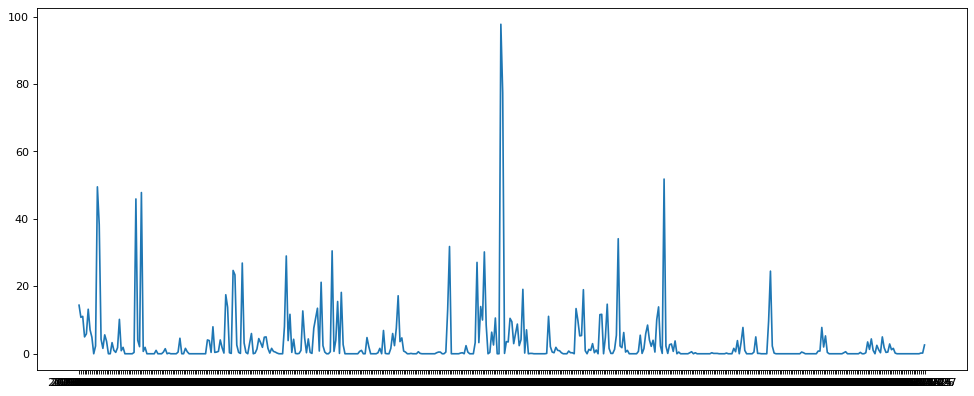

In [29]:
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=80)
plt.plot(meteo_df.precipitation)